# Presentation sections
## 1. Complete Case Analysis (CCA)
#### CCA: Definition
#### CCA: Limittations
## 2. Missing data imputation methods
#### 2.1 Mean/median imputation
#### 2.2 Arbitrary value imputation
#### 2.3 End of tail imputation
#### 2.4 Frequent Category imputation
#### 2.5 Missing category imputation
#### 2.6 Random sample imputation
## 3. Multivariate Imputation (Gán đa biến)
#### 3.1 Multivariate Imputation
#### 3.2 KNN Imputation
#### 3.3 MICE (multivariate imputation of chained equations)
#### 3.4 missForest

# Missing Data Imputation Overview
+ Imputation is the act of replacing missing data with statistical estimates of the missing values.
+ The goal of any imputation technique is to produce a complete dataset that can be used to train machine learning models.

## Standard Inputation Methods
+ Statistics: replacing missing values with statistical measures such as mean, median, or mode of the observed data.
+ Arbitrary: replacing missing values with arbitrary or predefined constants.
| <img src="img/fill1.png" /> | <img src="img/fill2.png" /> |
|-|-|

# 1. Complete Case Analysis (CCA)

### CCA: Definition
CCA consists in discarding obvervations with missing data.
+ Remove obvervations with NA from dataset.
+ Complete Case = Observation with data in all of variables.
+ Suitable for categorical and nummerical variables.
<img src="img/cca.png" />

### CCA: Limittations
+ Removed abservations could be predictive (if data not missing at random)
+ CCA could lead to a biased dataset: The distribution of the remaining observation differ from the original distribution.
+ When using out models in production, the model will not know how to handle the missing data.

=> CCA can be used in case we have NA missing in just few observations. 

# 2. MISSING DATA IMPUTATION METHODS
## 2.1 Mean/median imputation
#### (Gán giá trị trung bình hoặc trung vị)
+ Replace all concurrent values of missing values (NA) in a variable with the mean/median.
+ Suitale for nummerical variables, since `Mean` and `Median` can only be calculated on numerical variables.

| <img src="img/m1.png" /> | <img src="img/m2.png" /> |
|-|-|

#### Assumptions for use:
+ Data missing at random (MAR) / Data missing at completely random (MACR)
+ Missing observations most likely look like the majority of observations in the variable (e.g. mean/median).

#### Notes when use mean/median imputation:
+ When the variable is normally distributed the mean and median are approximately the same. Therefore, replacing missing values with mean and median is similar.
+ When the variable is skedwed, the median is better representation.
+ Should be used in cases where % NA is low, no more than <= 5% of variables are missing data or can be tested and adjusted, helps avoid situations:
    + Distorts the original variable distribution.
    + Distorts the original variance.
    + Distort the covariance with the remaining variables of the data set.
    


## 2.2 Arbitrary value imputation
#### (gán giá trị bất kì)
+ Arbitrary value imputation consists of replacing all occurrences of missing values (NA) within a variable with an arbitrary value.
+ Typically used arbitrary values are 0, 999, -999 (or other combinations of 9s) or -1 (if the distribution is positive).
+ Suitable for both numerical and category variables.

| <img src="img/a1.png" /> | <img src="img/a2.png" /> |
|-|-|

#### Assumptions for use:
+ Use for case data is missing at not random.

#### Notes when use arbitrary value imputation:
+ Replacing NA with arbitrary values should be used when there is reason to believe that NA is not randomly missing. 
    + Therefore, we need to flag missing values with another (any) value instead of using mean or median which represents the most common value.
    + We impute with a value that is different from most values in the distribution (outside that range).

## 2.3 End of tail imputation
In the previous section, we replaced the missing data with any value. However, determining any value is laborious and often done manually. We can automate this process by automatically selecting arbitrary values at the tail of the variable's distribution.
#### (gán giá trị ở cuối phân phối)
+ If the variable is normally distributed, we can use $mean \pm 3 \times std$.
+ If the variable is skewed, we can use the IQR proximity rule.
+ Suitable for numerical variables.
<img src="img/endi.png" />

#### Assumptions for use:
+ MNAR - random nonmissing values.
If the value is not missing at random, we will not use mean/median instead. Instead, we flag the observation as different and assign a value that lies at the tail of the distribution.

#### Notes when use end of tail imputation:
Similar to the arbitrary value imputation method

## 2.4 Frequent Category imputation
#### (Gán hạng mục thường xuất hiện)

+ Mode imputation is replacing all occurrences of missing values (NA) within a variable with the mode, or most frequent category
+ Suitable for categorical variables.

| <img src="img/q1.png" /> | <img src="img/q2.png" /> |
|-|-|

$$$$
#### Assumptions for use:
+ MCAR - Missing completely at random data.
+ The missing observations mostly look similar to the majority of observations in the variable (mode).

#### Notes when use end of tail imputation:
+ No more than 5% of variables contain missing data.

## 2.5 Missing category imputation
This method involves treating missing data as an additional label or category of the variable. The beauty of this technique is that it does not assume anything about the missing data, making it suitable when there is a lot of missing data.
#### (Dữ liệu bị khuyết là một hạng mục mới)

+ All missing observations are grouped in the newly created 'Missing' label.
+ Suitable for categorical variables
<img src="img/mu.png" width=500/>

#### Assumptions for use:
+ Use for case data is not missing at random

#### Notes when use missing category imputation:
+ If the number of NAs is small, creating additional categories may cause the tree to overfit.


## 2.6 Random sample imputation
#### (gán mẫu ngẫu nhiên)

+ Random sampling consist in taking a random observation from the pool of available observation of variable, and using that randomly extracted value to fill the NA
+ Suitable for both numerical and categorical variables.
+ Every time we score the same observation, we may obtain a different prediction, and we don't wanted side-affect.
<img src="img/mr.png" width=800/>

#### Assumptions for use:
+ Use for case data is missing at completely random.
#### Notes when use missing category imputation:
+ No more than 5% of variables contain missing data.
+ Well suited for linear models as it does not skew the distribution, regardless of the %NA.

## 2.7 Missing data indicator
#### (Chỉ báo khuyết dữ liệu)

If the data are not missing at random, you should replace the missing observations with the commonly occurring mean/median/category and flag those with a Missing Indicator.

Combination pairs to use:
+ Mean/median imputation + missing data index (number distortion) 
+ Frequent category imputation + missing data index (category variable)
+ Random sample imputation + data missing index (category variable and number distortion)

<img src="img/mi.png" width=600/>

# 3. Multivariate Imputation 
#### (Gán đa biến)
## Univariate Imputation
Imputes values in each feature using only non-missing values or statistical estimates derived from same feature.
+ Mean and medium imputation
+ Mode imputation
+ Ramdon sample imputation 
+ Etc ...

## 3.1 Multivariate Imputation
### Multivariate imputation: Define
Uses other features in the dataset to estimate the missing values.
+ Predict, as accurately as possible, the "real" values of those  missing observations.
+ We are offten not interested in those real values, instead in making accurate predictions of out target.
<img src="img/mm.png" />
### Multivariate imputation: Considerations
<img src="img/mlp.png" />

### Multivariate imputation: Techniques
+ KNN imputation
+ MICE (multivariate imputation of chained equations)
+ MissForest - extends MICE using Random Forests

## 3.2 KNN Imputation
Determine the missing data point value, as a weighted average of the values of its K nearest neighbors, with the logic:
+ If an observation looks very similar to other observations in the dataset, most likely, the missing value would be similar to the value shown in those similar observations.

The process of KNN imputation can be described as follows:

1. Identify variables with missing values.
2. Choose a number K (number of neighbors - also is challenge) based on a certain criterion: Euclidean distance or cosine distance, to determine the closest neighbors to the row to be predicted.
3. Use the value of that variable from K neighboring rows to estimate the missing value. This can be an average, weighted average, or frequency of occurrence depending on the specific problem.

<img src="img/ml1.png" />

KNN imputation has the advantage that it can tolerate non-linear relationships between variables and can produce better estimates than the stochastic imputation method. However, it also has the disadvantage of requiring a lot of computational resources, especially when the data set is large or when the dimensionality (number of variables) is large.

Original Data:
    Feature1  Feature2  Feature3
0   2.123620  2.835559  1.366115
1   3.852143       NaN  2.485531
2   3.195982       NaN  1.103166
3   2.795975  2.099086  3.727961
4   1.468056  2.368210  1.776340
5   1.467984       NaN  2.987567
6   1.174251  1.599021  1.935133
7   3.598528  2.542703  2.560204
8   2.803345  2.777244  2.640131
9   3.124218  1.139351  1.554563
10  1.061753  2.822635  3.908754
11  3.909730  1.511572  3.325398
12  3.497328  1.195155  3.818497
13  1.637017  3.846657  3.684482
14  1.545475  3.896896  2.793700
15  1.550214  3.425192  3.765623
16  1.912727  1.913841  1.265478
17  2.574269  1.293016  1.587949
18  2.295835  3.052699  1.135682
19  1.873687  2.320457  1.975991
Imputed Data:
    Feature1  Feature2  Feature3
0   2.123620  2.835559  1.366115
1   3.852143  2.277173  2.485531
2   3.195982  1.828356  1.103166
3   2.795975  2.099086  3.727961
4   1.468056  2.368210  1.776340
5   1.467984  3.722915  2.987567
6   1.174251  1.599021  1.935133
7   3.598528  

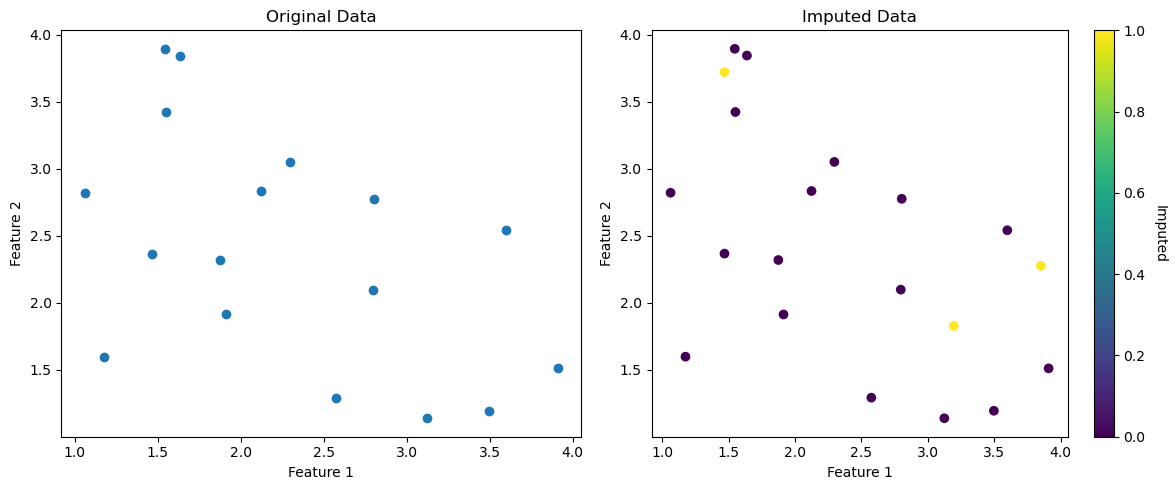

In [52]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

# Tạo dữ liệu mẫu có giá trị thiếu
np.random.seed(42)
data = {
    'Feature1': np.random.uniform(low=1, high=4, size=20),
    'Feature2': np.random.uniform(low=1, high=4, size=20),
    'Feature3': np.random.uniform(low=1, high=4, size=20)
}

# Chọn ngẫu nhiên một số giá trị để là NaN trong Feature2
nan_indices = np.random.choice(20, size=3, replace=False)
data['Feature2'][nan_indices] = np.nan

df = pd.DataFrame(data)

# In ra dữ liệu gốc
print("Original Data:")
print(df)

# Áp dụng KNN imputer
imputer = KNNImputer(n_neighbors=3)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# In ra dữ liệu gốc
print("Imputed Data:")
print(df_imputed)

# Tạo một cột mới để đánh dấu điểm dữ liệu đã được impute
df_imputed['Imputed'] = df['Feature2'].isnull()

# Vẽ biểu đồ so sánh
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Biểu đồ dữ liệu gốc
axes[0].scatter(df['Feature1'], df['Feature2'])
axes[0].set_title('Original Data')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# Biểu đồ dữ liệu đã được impute
scatter_imputed = axes[1].scatter(df_imputed['Feature1'], df_imputed['Feature2'], c=df_imputed['Imputed'], cmap='viridis')
axes[1].set_title('Imputed Data')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

# Thêm màu sắc vào thanh colorbar để đánh dấu
colorbar = plt.colorbar(scatter_imputed)
colorbar.set_label('Imputed', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()


## 3.3 MICE (multivariate imputation of chained equations)
MICE is a method of filling in the missing values of each variable, using other variables in the data set with the assumption of data missing at random (MAR).
+ A series of the models whereby each variable is modelled conditional upon the other variables in the data. 
+ Each incomplete variable is imputed by a separate model.
+ Works well with mixed data types (categorical and continuous)

MICE: framework
1. Mean imputation to fill NA
2. Values in 1 variable are reverted to NA
3. The variable is modelled upon the other variables
4. NA are replace by the model predictions

After all variable NA have been modelled based on other variables, 1 round of imputation is completed.

The procdure repeats itself n times, usually 10 imputation cycles are enough to find statble parameters for the models.

## 3.4 missForest
missForest is an extension method of MICE (Multivariate Imputation by Chained Equations). Both methods are used to handle missing data by estimating the missing value based on information from other variables in the data table.
+ Random Forest are used to regress with NA to the other variables in the data.
+ Works well with mixed data types (categorical and continuous)
+ Robust and accurate
+ Handles non-relationships and variable iterations

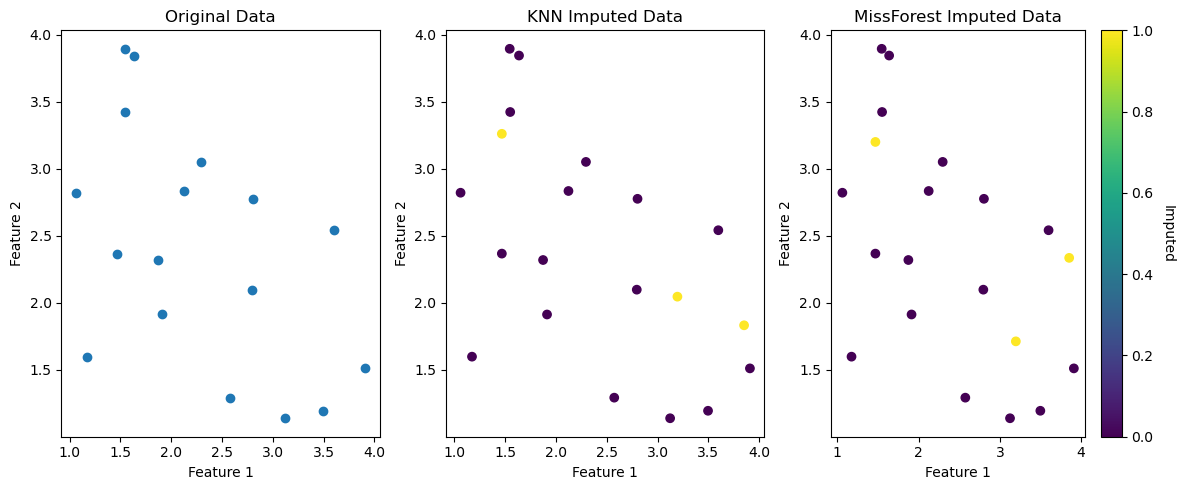

In [59]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor


imputer_knn = IterativeImputer(
    estimator=KNeighborsRegressor(n_neighbors=5),
    max_iter=10,
    random_state=0)

imputer_missForest = IterativeImputer(
    estimator=ExtraTreesRegressor(n_estimators=10, random_state=0),
    max_iter=10,
    random_state=0)

# Tạo dữ liệu mẫu có giá trị thiếu
np.random.seed(42)
data = {
    'Feature1': np.random.uniform(low=1, high=4, size=20),
    'Feature2': np.random.uniform(low=1, high=4, size=20),
    'Feature3': np.random.uniform(low=1, high=4, size=20)
}

# Chọn ngẫu nhiên một số giá trị để là NaN trong Feature2
nan_indices = np.random.choice(20, size=3, replace=False)
data['Feature2'][nan_indices] = np.nan

df = pd.DataFrame(data)


df_imputed_knn = pd.DataFrame(imputer_knn.fit_transform(df), columns=df.columns)
df_imputed_missForest = pd.DataFrame(imputer_missForest.fit_transform(df), columns=df.columns)

# Tạo một cột mới để đánh dấu điểm dữ liệu đã được impute
df_imputed_knn['Imputed'] = df['Feature2'].isnull()
df_imputed_missForest['Imputed'] = df['Feature2'].isnull()


# Vẽ biểu đồ so sánh
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

# Biểu đồ dữ liệu gốc
axes[0].scatter(df['Feature1'], df['Feature2'])
axes[0].set_title('Original Data')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# Biểu đồ dữ liệu đã được impute
scatter_imputed_knn = axes[1].scatter(df_imputed_knn['Feature1'], df_imputed_knn['Feature2'], c=df_imputed_knn['Imputed'], cmap='viridis')
axes[1].set_title('KNN Imputed Data')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

scatter_imputed = axes[2].scatter(df_imputed_missForest['Feature1'], df_imputed_missForest['Feature2'], c=df_imputed_missForest['Imputed'], cmap='viridis')
axes[2].set_title('MissForest Imputed Data')
axes[2].set_xlabel('Feature 1')
axes[2].set_ylabel('Feature 2')

# Thêm màu sắc vào thanh colorbar để đánh dấu
colorbar = plt.colorbar(scatter_imputed)
colorbar.set_label('Imputed', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()